### Introduction

#### Context
Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. This dataset was used to evaluate prediction algorithms in an effort to reduce burden on doctors.

#### Content
This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90".

#### Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)

### Load Python Modules

In [1]:
# import modules

import sys, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### EDA

In [2]:
# load data from csv

data_df = pd.read_csv('data/indian_liver_patient.csv')
data_df.shape

(583, 11)

In [3]:
data_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
# count missing values for each attribute

data_df.apply(lambda x: sum(x.isnull()))

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [6]:
# finding numeric columns

numcols = [col for col in data_df.columns if data_df[col].dtype != 'object']
numcols

['Age',
 'Total_Bilirubin',
 'Direct_Bilirubin',
 'Alkaline_Phosphotase',
 'Alamine_Aminotransferase',
 'Aspartate_Aminotransferase',
 'Total_Protiens',
 'Albumin',
 'Albumin_and_Globulin_Ratio',
 'Dataset']

In [7]:
# descriptive statistics of data

data_df[numcols].describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [8]:
data_df[numcols].quantile(0.9)

Age                            66.000
Total_Bilirubin                 7.860
Direct_Bilirubin                4.080
Alkaline_Phosphotase          511.400
Alamine_Aminotransferase      140.000
Aspartate_Aminotransferase    190.000
Total_Protiens                  7.900
Albumin                         4.100
Albumin_and_Globulin_Ratio      1.308
Dataset                         2.000
Name: 0.9, dtype: float64

Let's have a look at distribution of all the attributes but before diving into that lets remove outliers get a better look at the distribution. It seems Total bilirubin, Alkaline phosphate, Alamine aminotransferase and Aspartate amino transferase have outliers of higher order of magnitude (90th percentile looks better for them).

### Data Visualization

#### Distribution

Number of patients diagnosed with liver disease:  416
Number of patients not diagnosed with liver disease:  167


Number of Male patients:  441
Number of Female patients:  142




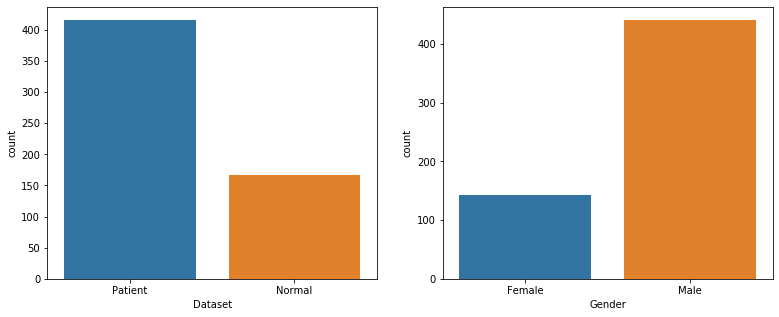

In [9]:
# Count of Patients and normal people

LD, NLD = data_df['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)
print('\n')

M, F = data_df['Gender'].value_counts()
print('Number of Male patients: ',M)
print('Number of Female patients: ',F)
print('\n')

fig, axs = plt.subplots(1,2, figsize=[13,5])

# distribution of patients with disease
g = sns.countplot(data=data_df,
                  x='Dataset',
                  label='Count',
                  ax=axs[0])
g.set_xticklabels(['Patient', 'Normal'])

# distribution of male and female
g = sns.countplot(data=data_df,
                  x='Gender',
                  label='Count',
                  ax=axs[1])
#g.set_xticklabels(['Male', 'Female'])

plt.show()

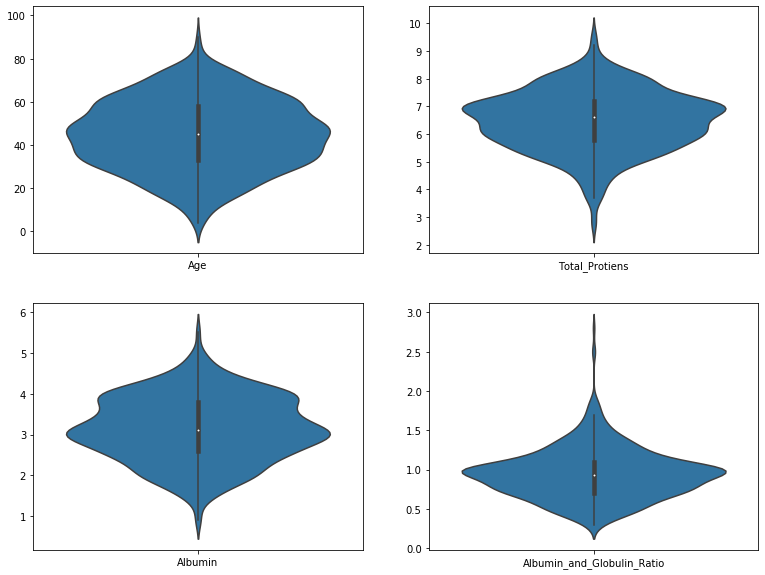

In [10]:
# Distribution of attributes with no outliers

cols = [numcols[i] for i in [0,6,7,8]]
fig, axs = plt.subplots(2,2, figsize = [13,10])
axs = axs.flatten()
for idx, ax in enumerate(axs):
    g = sns.violinplot(data=data_df[cols[idx]], ax = ax)
    g.set_xticklabels([cols[idx]])
plt.show()

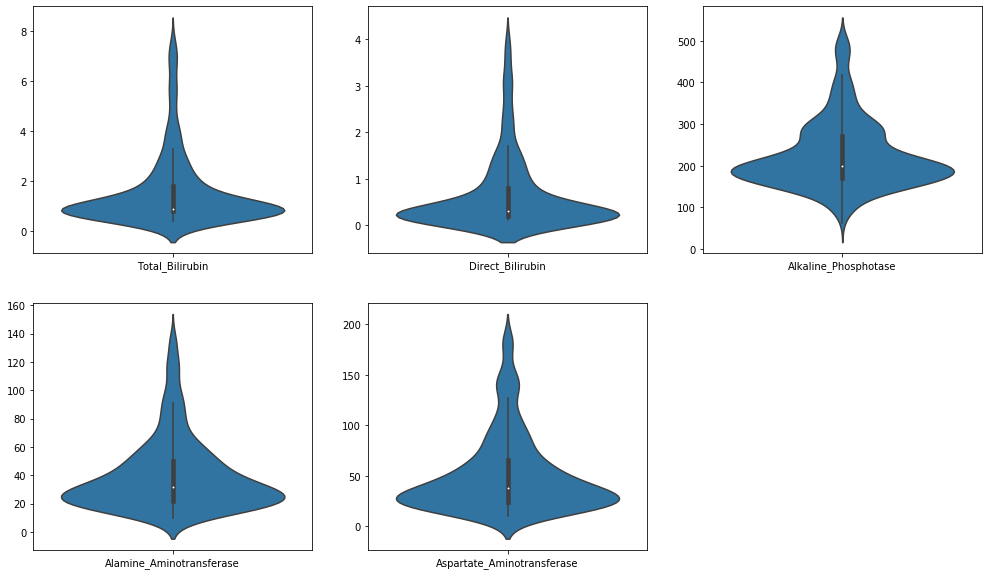

In [11]:
# Distribution of attributes with outliers removed

cols = numcols[1:6]
fig, axs = plt.subplots(2,3, figsize = [17,10])
axs = axs.flatten()
for idx, ax in enumerate(axs):
    if idx < 5:
        temp = data_df[cols[idx]]
        temp = temp[temp < temp.quantile(0.9)]
        g = sns.violinplot(data=temp, ax = ax)
        g.set_xticklabels([cols[idx]])
    else:
        fig.delaxes(ax)
plt.show()

let's look at distribution of these attributes for liver patients and non liver patients separately

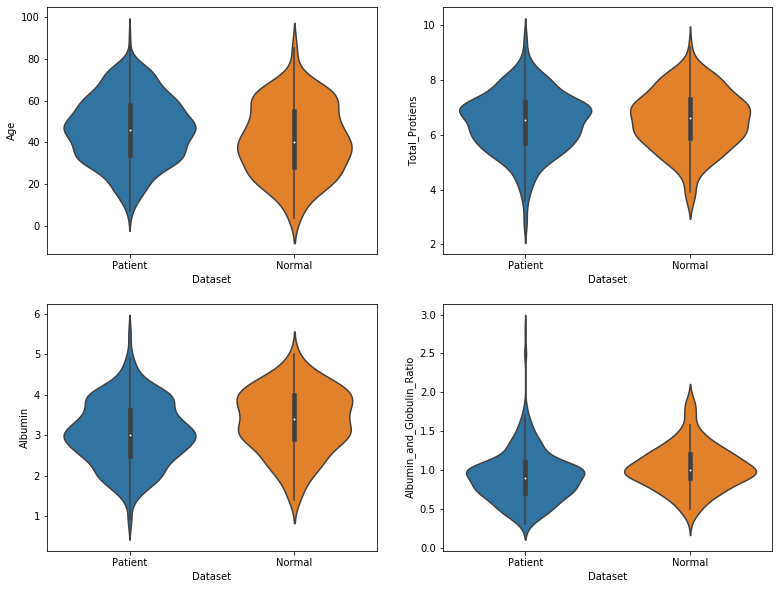

In [12]:
# Distribution of attributes with no outliers

cols = [numcols[i] for i in [0,6,7,8]]
fig, axs = plt.subplots(2,2, figsize = [13,10])
axs = axs.flatten()
for idx, ax in enumerate(axs):
    g = sns.violinplot(data=data_df, y = cols[idx], x = 'Dataset', ax = ax)
    g.set_xticklabels(['Patient', 'Normal'])
plt.show()

observations:
*  Older people are more likely to have liver disease
*  Normal people are more likely to have higher albumin levels
*  Patients seem to have lower level of albumin and globulin ratio

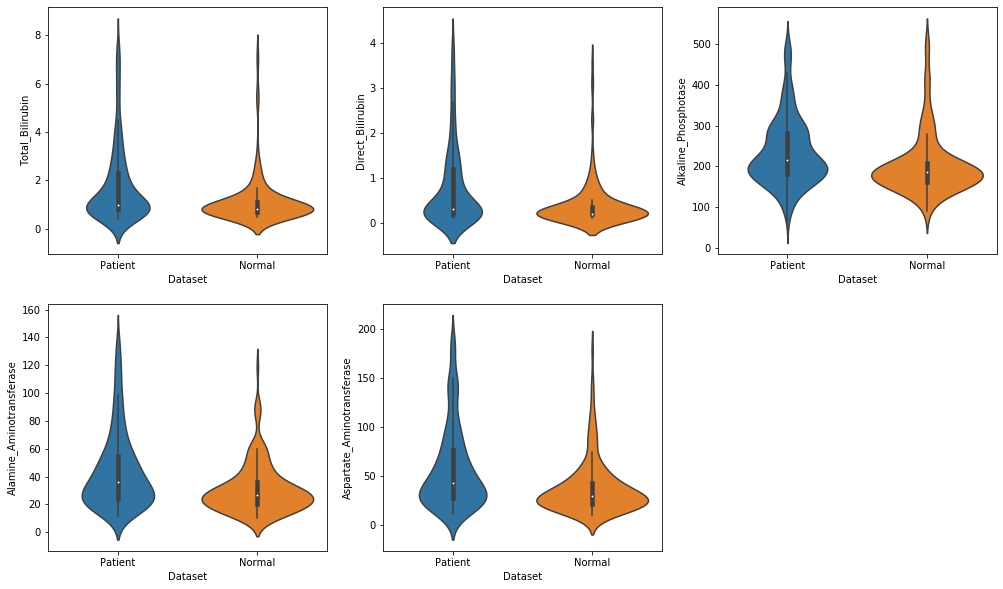

In [13]:
# Distribution of attributes with outliers removed

cols = numcols[1:6]
fig, axs = plt.subplots(2,3, figsize = [17,10])
axs = axs.flatten()
for idx, ax in enumerate(axs):
    if idx < 5:
        temp = data_df[data_df[cols[idx]] < data_df[cols[idx]].quantile(0.9)]
        g = sns.violinplot(data=temp,y=cols[idx], x='Dataset', ax = ax)
        g.set_xticklabels(['Patient', 'Normal'])
    else:
        fig.delaxes(ax)
plt.show()

Obsevations:
*  Liver disease patients seem to have higher levels of all of the above attributes, since patients have thicker tails than normal people

Observation:
*  age seems to be playing a role in liver disease especially in males

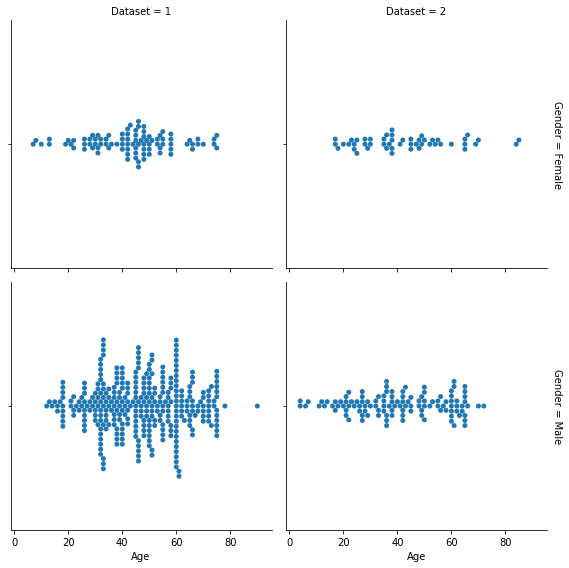

In [15]:
# distribution of age by gender and dataset

g = sns.catplot(data=data_df,
                x='Age',
                row='Gender',
                col='Dataset',
                kind='swarm',
                height=4,
                margin_titles=True)

plt.show(g)

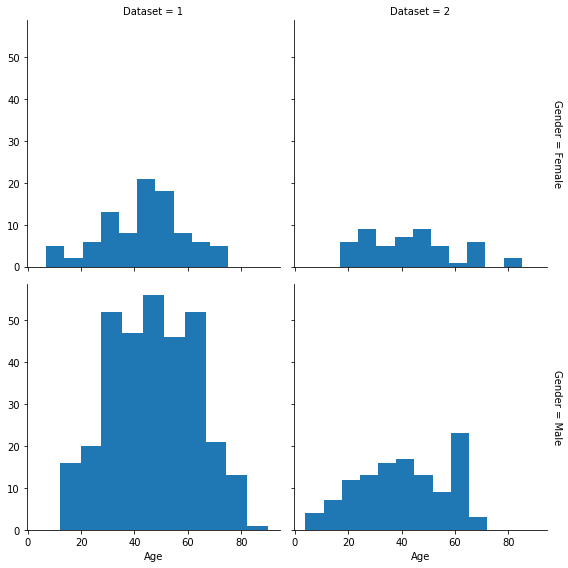

In [16]:
# distribution of age by gender and dataset

g = sns.FacetGrid(data=data_df,
                  col="Dataset",
                  row="Gender",
                  height=4,
                  margin_titles=True)

g.map(plt.hist, "Age")
plt.show()

#### Linear Relationship

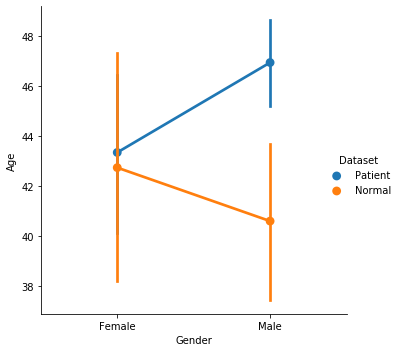

In [14]:
# point estimate by gender and disease status

g = sns.catplot(data=data_df,
                x='Gender',
                y='Age',
                hue='Dataset',
                kind='point')

leg = g._legend
leg.texts[0].set_text('Patient')
leg.texts[1].set_text('Normal')
plt.show()

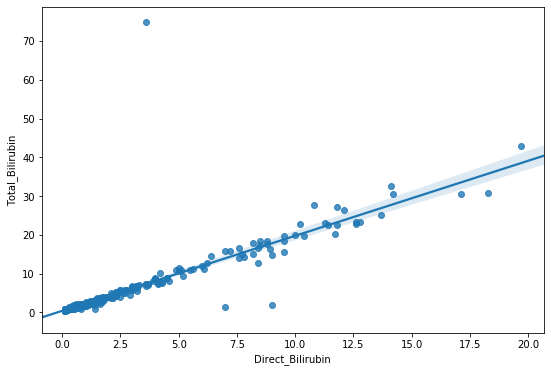

In [33]:
# linear relation between total bilirubin and direct bilirubin

fig, axs = plt.subplots(figsize = [9,6])
sns.regplot(x='Direct_Bilirubin',
            y='Total_Bilirubin',
            data=data_df,
            ax=axs
           )
plt.show()

Observations:
*  Total Bilirubin and direct bilirubin seems to be correlated as expected

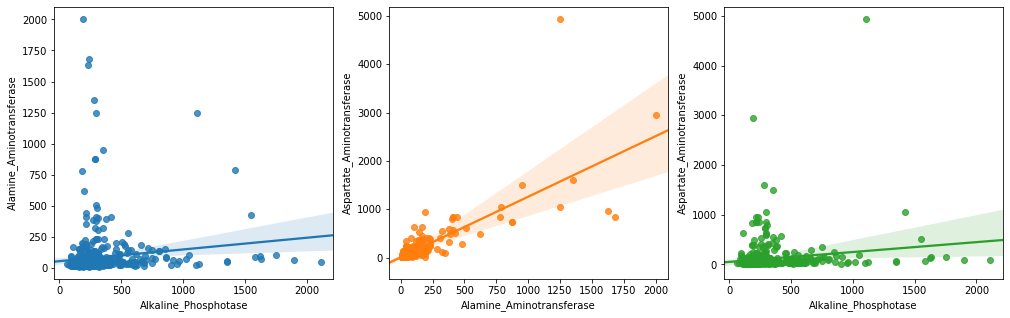

In [36]:
# linear relation between alkaline phosphotase, alamine aminotransferase and aspartate aminotransfer

fig, axs = plt.subplots(1,3, figsize=[17,5])
sns.regplot(x='Alkaline_Phosphotase',
            y='Alamine_Aminotransferase',
            data=data_df,
            ax=axs[0])
sns.regplot(x='Alamine_Aminotransferase',
            y='Aspartate_Aminotransferase',
            data=data_df,
            ax=axs[1])
sns.regplot(x='Alkaline_Phosphotase',
            y='Aspartate_Aminotransferase',
            data=data_df,
            ax=axs[2])
plt.show()

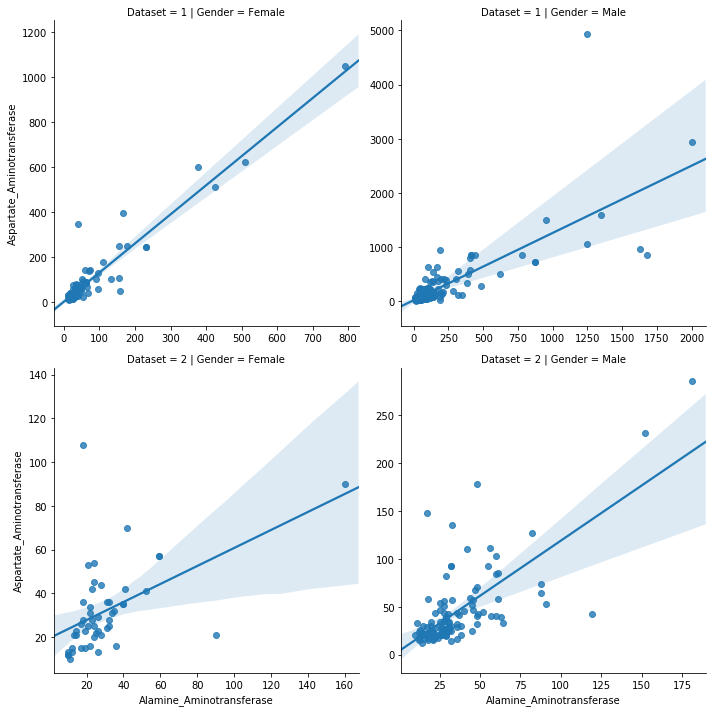

In [44]:
# linear relation between alamine aminotransferase and aspartate aminotransferase
# grouped by gender adn liver disease status

g = sns.lmplot(x='Alamine_Aminotransferase',
               y='Aspartate_Aminotransferase',
               col='Gender',
               row='Dataset',
               data=data_df,
               sharex=False,
               sharey=False)
plt.show(g)

Observations:
*  Alamine aminotransferase and aspartate aminotransferase seems to be correlated

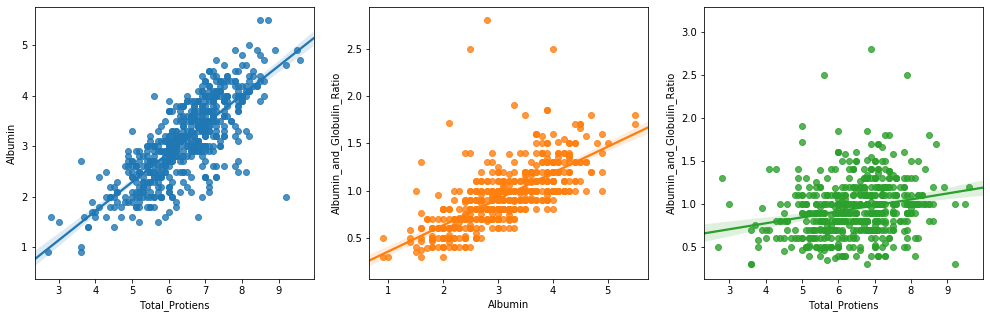

In [37]:
# linear relation between total protien, albumin, albumin and globulin ratio

fig, axs = plt.subplots(1,3, figsize=[17,5])
sns.regplot(x='Total_Protiens',
            y='Albumin',
            data=data_df,
            ax=axs[0])
sns.regplot(x='Albumin',
            y='Albumin_and_Globulin_Ratio',
            data=data_df,
            ax=axs[1])
sns.regplot(x='Total_Protiens',
            y='Albumin_and_Globulin_Ratio',
            data=data_df,
            ax=axs[2])
plt.show()

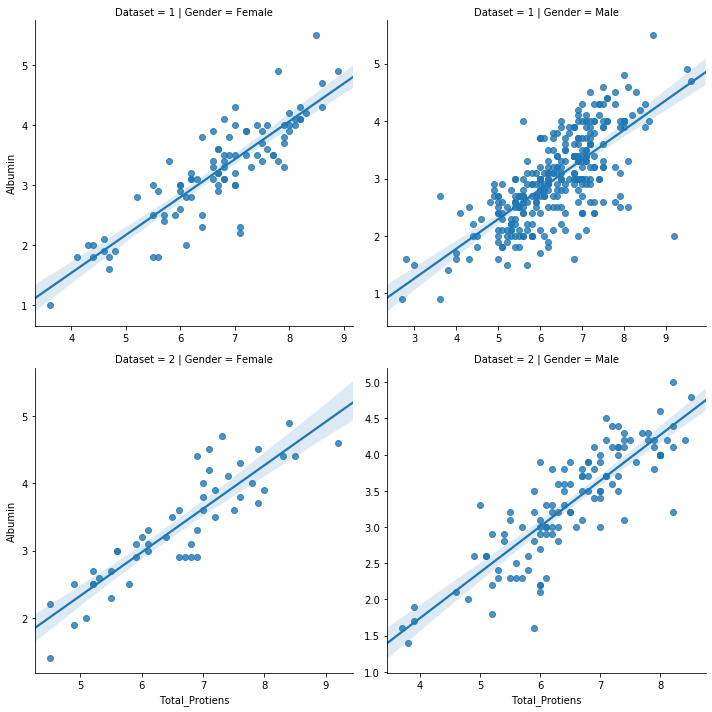

In [45]:
# linear relation between total protiens and albumin
# grouped by gender adn liver disease status

g = sns.lmplot(x='Total_Protiens',
               y='Albumin',
               col='Gender',
               row='Dataset',
               data=data_df,
               sharex=False,
               sharey=False)
plt.show(g)

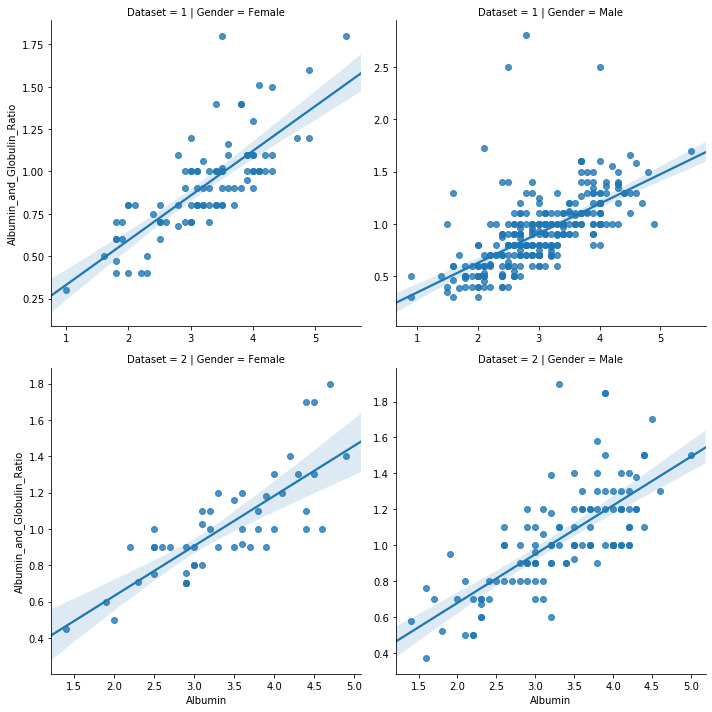

In [46]:
# linear relation between albumin and albumin and globulin ratio
# grouped by gender adn liver disease status

g = sns.lmplot(x='Albumin',
               y='Albumin_and_Globulin_Ratio',
               col='Gender',
               row='Dataset',
               data=data_df,
               sharex=False,
               sharey=False)
plt.show(g)

Observations so far:
*  following attributes are found to be correlated:
    1. Total bilirubin and direct bilirubin
    2. Total protien and albumin
    3. albumin and albumin and glublin ratio
    4. alkaline aminotransferase and aspartate aminotransferase

Let's quantify the correlation between them but before that let's impute missing values

In [48]:
# count missing values for each attribute

data_df.apply(lambda x: sum(x.isnull()))

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [50]:
data_df['Albumin_and_Globulin_Ratio'] = data_df.Albumin_and_Globulin_Ratio.fillna(data_df.Albumin_and_Globulin_Ratio.mean())

In [51]:
# count missing values for each attribute

data_df.apply(lambda x: sum(x.isnull()))

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

#### Correlation matrix

In [54]:
collst = numcols[:-1]
corrmat = data_df[collst].corr()
corrmat

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322
Albumin_and_Globulin_Ratio,-0.216089,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000


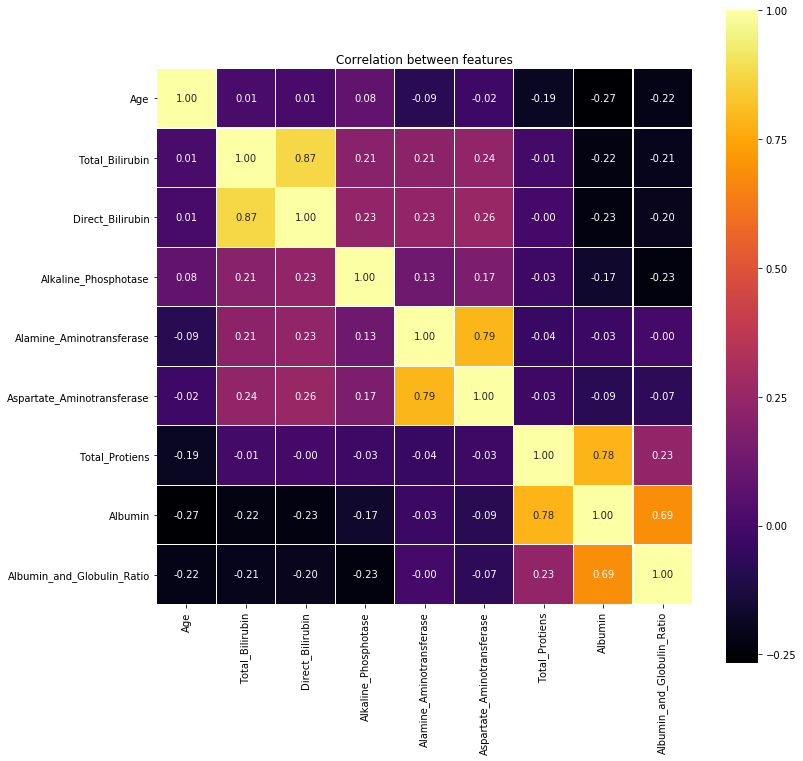

In [70]:
plt.figure(figsize=(12, 12))
g = sns.heatmap(corrmat,
            cbar = True,
            square = True,
            annot=True,
            linewidth=0.3,
            fmt='.2f',
            cmap='inferno')
plt.title('Correlation between features')
plt.show()